# <a id='toc1_'></a>[Inaugural Project](#toc0_)

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

**Table of contents**<a id='toc0_'></a>    
- [Inaugural Project](#toc1_)    
  - [Member](#toc1_1_)    
- [Question 1](#toc2_)    
- [Question 2](#toc3_)    
- [Question 3](#toc4_)    
- [Question 4](#toc5_)    
- [Question 5](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Member](#toc0_)
- [Emil Kjems](https://github.com/E-Kjems)

Imports and set magics:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <a id='toc2_'></a>[Question 1](#toc0_)

**Explain how you solve the model**

In [7]:
# code for solving the model (remember documentation and comments)

# a = np.array([1,2,3])
# b = inauguralproject.square(a)
# print(b)

# <a id='toc3_'></a>[Question 2](#toc0_)

Explain your code and procedure

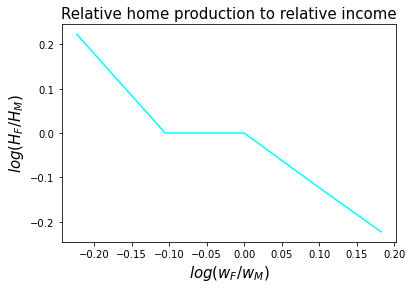

In [8]:
# Defining model
model = HouseholdSpecializationModelClass()

# Resetting alpha and sigma to their respective baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

# Defining male and female wages and retrieving them from HouseholdSpecializationModel
wF = model.par.wF_vec
wM = model.par.wM

# Creating empty lists for the values of log(HF/HM) and log(wF/wM)
log_ratio = []
log_wages = []

# Finding the optimal values for HF and HM by iteration using the discrete solver
# And appending them to the lists above
for femalewages in wF:
    model.par.wF = femalewages
    opt = model.solve_discrete()
    log_ratio.append(np.log(opt.HF/opt.HM))
    log_wages.append(np.log(femalewages/wM))

# Plotting log(HF/HM) and log(wF/wM) against each other
plt.plot(log_wages, log_ratio, color="cyan")
plt.xlabel("$log(w_{F}/w_{M})$", fontsize=15)
plt.ylabel("$log(H_{F}/H_{M})$", fontsize=15)
plt.title("Relative home production to relative income", fontsize=15)
plt.show()

# <a id='toc4_'></a>[Question 3](#toc0_)

Explain your code and procedure

In [4]:
# code

# <a id='toc5_'></a>[Question 4](#toc0_)

Explain your code and procedure

In [ ]:
# code

# <a id='toc6_'></a>[Question 5](#toc0_)

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.